# 과대적합 - 과소적합
- IMDB  영화 리뷰 분류 모델의 성능을 향상시켜보자

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [3]:
imdb = keras.datasets.imdb

NUM_WORDS = 1000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [4]:
train_data.shape, test_data.shape

((25000, 1000), (25000, 1000))

In [5]:
train_data[:1]

array([[0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
        1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 

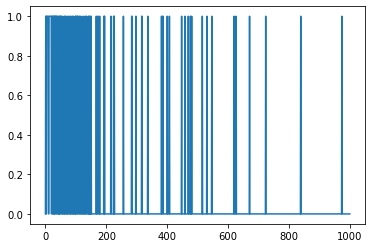

In [6]:
plt.plot(train_data[0])

In [7]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
baseline_history=baseline_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

ERROR! Session/line number was not unique in database. History logging moved to new session 176
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.5776 - accuracy: 0.7103 - binary_crossentropy: 0.5776 - val_loss: 0.4269 - val_accuracy: 0.8266 - val_binary_crossentropy: 0.4269
Epoch 2/20
25000/25000 - 0s - loss: 0.3638 - accuracy: 0.8498 - binary_crossentropy: 0.3638 - val_loss: 0.3458 - val_accuracy: 0.8523 - val_binary_crossentropy: 0.3458
Epoch 3/20
25000/25000 - 0s - loss: 0.3202 - accuracy: 0.8665 - binary_crossentropy: 0.3202 - val_loss: 0.3304 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3304
Epoch 4/20
25000/25000 - 0s - loss: 0.3078 - accuracy: 0.8732 - binary_crossentropy: 0.3078 - val_loss: 0.3288 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3288
Epoch 5/20
25000/25000 - 0s - loss: 0.3032 - accuracy: 0.8747 - binary_crossentropy: 0.3032 - val_loss: 0.3300 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3300
Epoch 6/20
250

In [9]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6589 - accuracy: 0.6224 - binary_crossentropy: 0.6589 - val_loss: 0.6129 - val_accuracy: 0.7421 - val_binary_crossentropy: 0.6129
Epoch 2/20
25000/25000 - 0s - loss: 0.5546 - accuracy: 0.7848 - binary_crossentropy: 0.5546 - val_loss: 0.5002 - val_accuracy: 0.8211 - val_binary_crossentropy: 0.5002
Epoch 3/20
25000/25000 - 0s - loss: 0.4452 - accuracy: 0.8366 - binary_crossentropy: 0.4452 - val_loss: 0.4107 - val_accuracy: 0.8420 - val_binary_crossentropy: 0.4107
Epoch 4/20
25000/25000 - 0s - loss: 0.3767 - accuracy: 0.8525 - binary_crossentropy: 0.3767 - val_loss: 0.3682 - val_accuracy: 0.8512 - val_binary_crossentropy: 0.3682
Epoch 5/20
25000/25000 - 0s - loss: 0.3424 - accuracy: 0.8630 - binary_crossentropy: 0.3424 - val_loss: 0.3478 - val_accuracy: 0.8570 - val_binary_crossentropy: 0.3478
Epoch 6/20
25000/25000 - 0s - loss: 0.3251 - accuracy: 0.8673 - binary_crossentropy: 0.3251 - val_loss: 0.3376

In [11]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
bigger_history = bigger_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.4202 - accuracy: 0.8070 - binary_crossentropy: 0.4202 - val_loss: 0.3454 - val_accuracy: 0.8516 - val_binary_crossentropy: 0.3454
Epoch 2/20
25000/25000 - 1s - loss: 0.2883 - accuracy: 0.8807 - binary_crossentropy: 0.2883 - val_loss: 0.3232 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3232
Epoch 3/20
25000/25000 - 1s - loss: 0.2273 - accuracy: 0.9109 - binary_crossentropy: 0.2273 - val_loss: 0.3372 - val_accuracy: 0.8557 - val_binary_crossentropy: 0.3372
Epoch 4/20
25000/25000 - 1s - loss: 0.1138 - accuracy: 0.9641 - binary_crossentropy: 0.1138 - val_loss: 0.4132 - val_accuracy: 0.8427 - val_binary_crossentropy: 0.4132
Epoch 5/20
25000/25000 - 1s - loss: 0.0286 - accuracy: 0.9952 - binary_crossentropy: 0.0286 - val_loss: 0.5416 - val_accuracy: 0.8482 - val_binary_crossentropy: 0.5416
Epoch 6/20
25000/25000 - 1s - loss: 0.0053 - accuracy: 0.9998 - binary_crossentropy: 0.0053 - val_loss: 0.6111

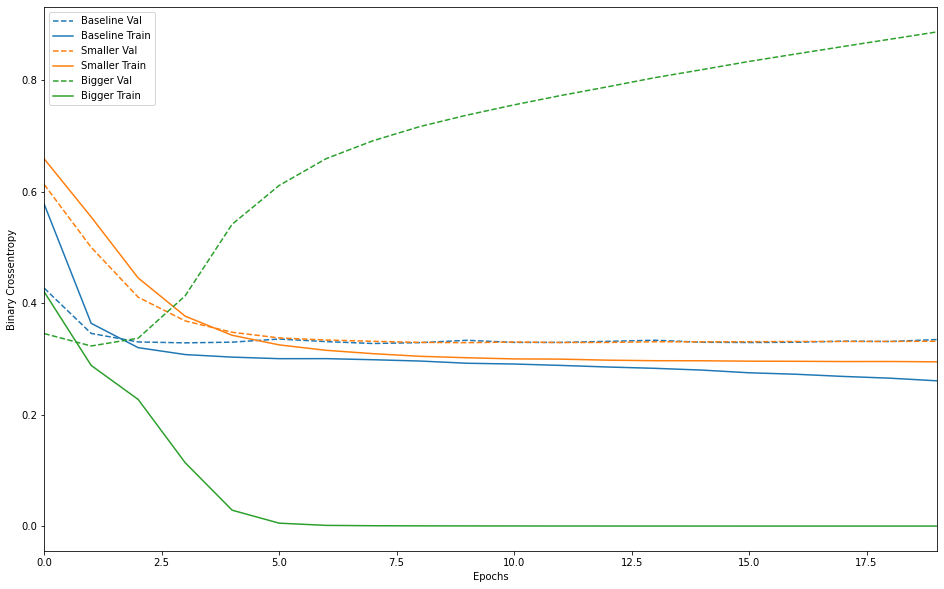

In [16]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_'," ").title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])
plot_history([('baseline', baseline_history),
                ('smaller', smaller_history),
                ('bigger', bigger_history)])

In [19]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

ERROR! Session/line number was not unique in database. History logging moved to new session 180
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6096 - accuracy: 0.7169 - binary_crossentropy: 0.5661 - val_loss: 0.4587 - val_accuracy: 0.8255 - val_binary_crossentropy: 0.4168
Epoch 2/20
25000/25000 - 0s - loss: 0.4065 - accuracy: 0.8478 - binary_crossentropy: 0.3650 - val_loss: 0.3848 - val_accuracy: 0.8553 - val_binary_crossentropy: 0.3441
Epoch 3/20
25000/25000 - 0s - loss: 0.3621 - accuracy: 0.8672 - binary_crossentropy: 0.3223 - val_loss: 0.3721 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3333
Epoch 4/20
25000/25000 - 0s - loss: 0.3478 - accuracy: 0.8727 - binary_crossentropy: 0.3098 - val_loss: 0.3661 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3290
Epoch 5/20
25000/25000 - 0s - loss: 0.3407 - accuracy: 0.8745 - binary_crossentropy: 0.3043 - val_loss: 0.3628 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3272
Epoch 6/20
250

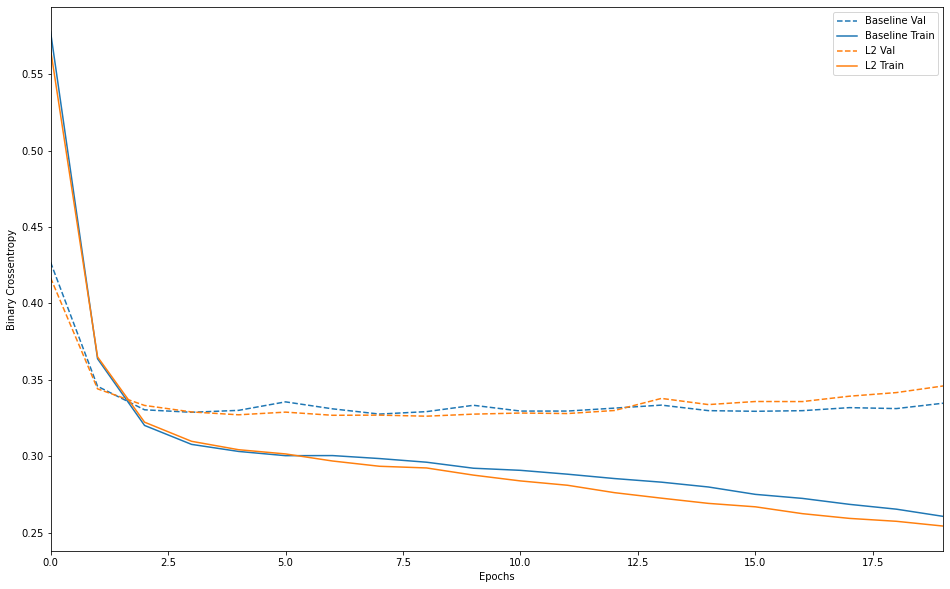

In [20]:
plot_history([('baseline', baseline_history),
             ('l2', l2_model_history)])

In [22]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

ERROR! Session/line number was not unique in database. History logging moved to new session 181
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6883 - accuracy: 0.5280 - binary_crossentropy: 0.6883 - val_loss: 0.6543 - val_accuracy: 0.6667 - val_binary_crossentropy: 0.6543
Epoch 2/20
25000/25000 - 0s - loss: 0.6189 - accuracy: 0.6512 - binary_crossentropy: 0.6189 - val_loss: 0.5011 - val_accuracy: 0.8137 - val_binary_crossentropy: 0.5011
Epoch 3/20
25000/25000 - 0s - loss: 0.5213 - accuracy: 0.7475 - binary_crossentropy: 0.5213 - val_loss: 0.4048 - val_accuracy: 0.8444 - val_binary_crossentropy: 0.4048
Epoch 4/20
25000/25000 - 0s - loss: 0.4553 - accuracy: 0.7934 - binary_crossentropy: 0.4553 - val_loss: 0.3608 - val_accuracy: 0.8507 - val_binary_crossentropy: 0.3608
Epoch 5/20
25000/25000 - 0s - loss: 0.4210 - accuracy: 0.8184 - binary_crossentropy: 0.4210 - val_loss: 0.3385 - val_accuracy: 0.8565 - val_binary_crossentropy: 0.3385
Epoch 6/20
250

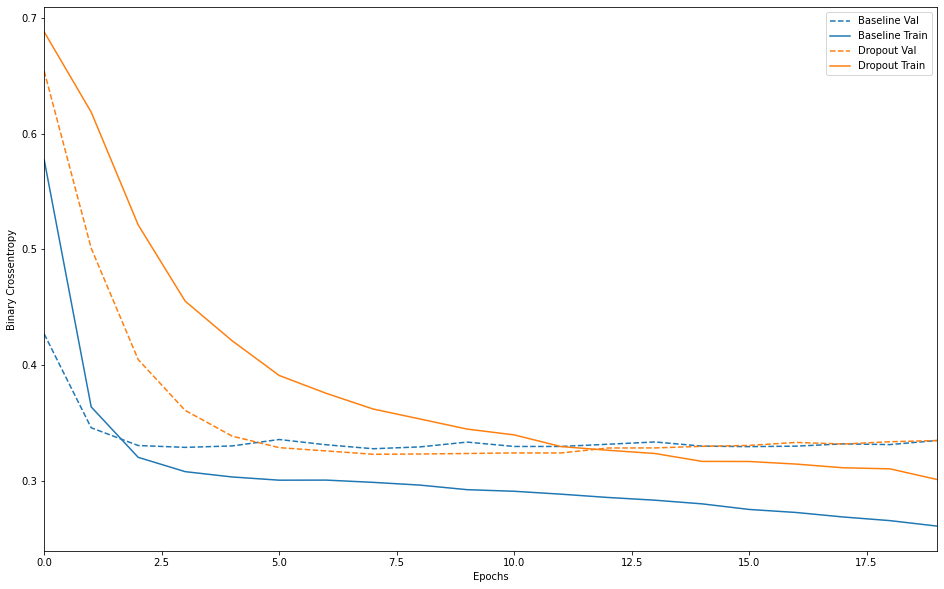

In [23]:
plot_history([('baseline', baseline_history),
             ('dropout', dpt_model_history)])

In [24]:
344/8

43.0